In [27]:
import numpy as np
import pandas as pd
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_validate
from autogluon.tabular import TabularDataset, TabularPredictor
import time

import toolsets.feature_engineering as fe
import toolsets.data_prep as data_prep
import toolsets.auto_rt_pred as ap
import seaborn as sns
from tqdm import tqdm
import toolsets.spectra_operations as so
%load_ext autoreload
%autoreload 2
import toolsets.helpers as helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# below cell is for preprocessing

In [36]:
data_binbase = pd.read_csv("/Users/fanzhoukong/Documents/GitHub/LC_binbase/bins_shen_hilic_pos_neg_nist.csv")
data_original = pd.read_csv("/Users/fanzhoukong/Documents/GitHub/LC_binbase/bins_shen_hilic_pos_neg.csv")
result_filtered = helper.pick_results(data_binbase, data_original)
result_filtered = helper.get_smiles(result_filtered)

100%|██████████| 352/352 [02:39<00:00,  2.21it/s]


In [37]:
result_filtered.to_csv("data/lcbinbase/pdata_hilic_5m_orbitrap_beh_pos_neg.csv", index = False)

In [39]:
del(result_filtered)

In [40]:
# data = pd.read_csv("data/lcbinbase/pdata_hilic_5m_orbitrap_beh_pos_neg.csv")


In [43]:
# from rdkit import Chem
# from rdkit.Chem import Draw
# Draw.MolToImage(Chem.MolFromSmarts(data.iloc[2]['SMILES']), molsPerRow=6, subImgSize=(180, 180))

In [87]:
# data = helper.get_class(data)

100%|██████████| 352/352 [00:33<00:00, 10.38it/s]


In [97]:
data.to_csv("data/lcbinbase/pdata_hilic_5m_orbitrap_beh_pos_neg.csv", index = False)

In [93]:
len(organic_acids['library_inchi'].unique())

82

In [79]:
from toolsets import classyfire

In [41]:
data.head()

,score,notes,instrument_type,comments,splash,precursormz,normalized_entropy,library_inchi,library_adduct,retention_time,entropy,msms,SMILES
0,0.933503,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2900000000-e2d4228d01eb088edb4c,187.006927,0.585092,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,9.545269,0.642789,48.0717\t450267.34\n51.3891\t393197.50\n75.133...,CC1=CC=C(C=C1)OS(=O)(=O)O
1,0.861438,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-03di-0090000000-50c784f4d23edc26266a,339.265289,0.532720,HPTJABJPZMULFH-UHFFFAOYSA-N,[M-H]-,10.857703,0.954507,59.3399\t5257.62\n68.3057\t4320.52\n75.1902\t4...,C1CCC(CC1)NC(=O)NCCCCCCCCCCCC(=O)O
2,0.904654,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0059-9240000000-bdfa675ad1d767596591,212.002335,0.756018,BXFFHSIDQOFMLE-UHFFFAOYSA-N,[M-H]-,12.596388,1.354602,48.2187\t3133.33\n54.4944\t3158.54\n62.1300\t3...,C1=CC=C2C(=C1)C(=CN2)OS(=O)(=O)O
3,0.875608,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0k9i-0920000000-201c2ecaf1c7c631902e,182.045883,0.521532,HXACOUQIXZGNBF-UHFFFAOYSA-N,[M-H]-,14.534856,1.084496,53.8822\t826.05\n65.9996\t987.83\n92.0508\t192...,CC1=NC=C(C(=C1O)C(=O)O)CO
4,0.779220,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0059-0090000000-733db74da453b040b1db,830.590759,0.635848,FORFDCPQKJHEBF-VPUSDGANSA-N,[M+CHO2]-,14.604331,1.630917,152.9959\t2948.56\n168.0431\t14618.28\n202.078...,CCCCCCCCCCCCCCCCCC(=O)OCC(COP(=O)([O-])OCC[N+]...


In [20]:
import toolsets.ms2_spectra_plotter as ms2plotter

i am ms2 spectra plotter, and I have been sideloaded successfully
I have 2 functions, head to tail plot and ms2 plot


<AxesSubplot:xlabel='retention_time', ylabel='Count'>

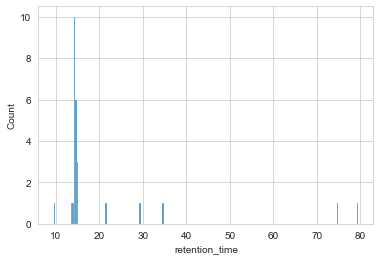

In [39]:
sns.histplot(data_temp['retention_time'])

In [40]:
data_temp['retention_time'].quantile(0.05)

13.891981820633164

In [44]:
data_temp['retention_time'].describe()['mean']

20.471460334265284

In [47]:
right_bound = data_temp['retention_time'].describe()['mean']+data_temp['retention_time'].describe()['std']
left_bound = data_temp['retention_time'].describe()['mean']-data_temp['retention_time'].describe()['std']

In [48]:
data_temp_include = data_temp.loc[data_temp['retention_time'].between(left_bound, right_bound, inclusive="both")]

In [49]:
data_temp_exclude = data_temp.loc[~data_temp['retention_time'].between(left_bound, right_bound, inclusive="both")]

In [50]:
data_temp_include.shape

(25, 1625)

In [52]:
data_temp_exclude

,score,notes,instrument_type,comments,splash,precursormz,normalized_entropy,library_inchi,library_adduct,retention_time,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,msms
47,0.934037,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-ac641457b7f3075f4ca1,187.006927,0.591873,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,79.434094,...,42.369147,188.01433,9.400716,207,12,58.0,61.0,5.534722,2.541667,43.4719\t658597.44\n55.5859\t641756.81\n56.126...
164,0.934291,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-18c1d343e27d24d1c6a7,187.006882,0.592024,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,74.719501,...,42.369147,188.01433,9.400716,207,12,58.0,61.0,5.534722,2.541667,52.2323\t588410.38\n79.0183\t417944.53\n79.951...


In [56]:
data_temp_include['retention_time'].describe()

count    25.000000
mean     15.943033
std       5.224142
min       9.545269
25%      14.324961
50%      14.454435
75%      14.759411
max      34.647135
Name: retention_time, dtype: float64

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/matplotlib/pyplot.py'>

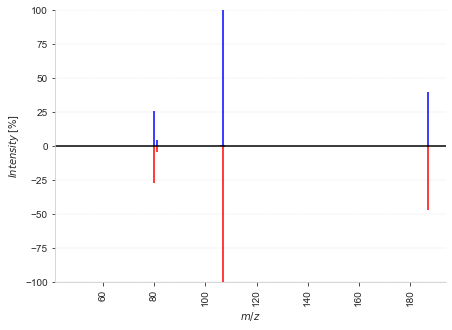

In [62]:
ms2plotter.head_to_tail_plot(data_temp_include.iloc[0]['msms'],data_temp_exclude.iloc[1]['msms'])

In [323]:
data_hilic = pd.concat([data['retention_time'],descriptors_imputed], axis=1)

In [351]:
data_temp

,score,notes,instrument_type,comments,splash,precursormz,normalized_entropy,library_inchi,library_adduct,retention_time,...,MAXdssC,MAXdO,MINssCH2,MINdssC,MINdO,Kier3,MDEC-22,MDEC-23,MDEC-33,MDEO-11
0,0.933503,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2900000000-e2d4228d01eb088edb4c,187.006927,0.585092,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,9.545269,...,0.043426,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
26,0.932428,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-aeebd4cee644bd147192,187.006866,0.565701,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,34.647135,...,0.050926,10.218913,0.069444,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
47,0.934037,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-ac641457b7f3075f4ca1,187.006927,0.591873,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,79.434094,...,0.050926,10.218913,0.184308,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
164,0.934291,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-18c1d343e27d24d1c6a7,187.006882,0.592024,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,74.719501,...,0.043426,10.218913,0.041879,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
411,0.932785,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-1c9fd20dfbcd8728612a,187.006864,0.570274,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.547311,...,0.050926,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
460,0.933005,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1910000000-ffe04d0521840fd1223f,187.006784,0.573083,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.105863,...,0.050926,10.218913,0.041667,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
521,0.932851,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-4dce8a6c5dcc87c01aa3,187.006842,0.572360,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.454435,...,0.050926,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
543,0.933147,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-a3f765faa32975203647,187.006780,0.573399,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.558808,...,0.050926,10.218913,0.085532,-0.065463,10.218913,4.0,3.301927,5.656854,0.333333,1.5
558,0.932969,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-758349a6f2f269950d15,187.006783,0.577678,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,29.551713,...,0.043426,10.218913,0.041879,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
598,0.932845,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1910000000-312f4f8aba73f9e6cf12,187.006812,0.571618,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.298367,...,0.043426,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5


In [341]:
# inchi = []
# max = []
# min = []
for inchi in data_hilic_full['library_inchi'].unique():
    data_temp = data_hilic_full.loc[data_hilic_full['library_inchi']==inchi]
    break

In [343]:
data_temp

,score,notes,instrument_type,comments,splash,precursormz,normalized_entropy,library_inchi,library_adduct,retention_time,...,MAXdssC,MAXdO,MINssCH2,MINdssC,MINdO,Kier3,MDEC-22,MDEC-23,MDEC-33,MDEO-11
0,0.933503,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2900000000-e2d4228d01eb088edb4c,187.006927,0.585092,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,9.545269,...,0.043426,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
26,0.932428,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-aeebd4cee644bd147192,187.006866,0.565701,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,34.647135,...,0.050926,10.218913,0.069444,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
47,0.934037,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-ac641457b7f3075f4ca1,187.006927,0.591873,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,79.434094,...,0.050926,10.218913,0.184308,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
164,0.934291,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-18c1d343e27d24d1c6a7,187.006882,0.592024,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,74.719501,...,0.043426,10.218913,0.041879,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
411,0.932785,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-1c9fd20dfbcd8728612a,187.006864,0.570274,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.547311,...,0.050926,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
460,0.933005,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1910000000-ffe04d0521840fd1223f,187.006784,0.573083,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.105863,...,0.050926,10.218913,0.041667,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
521,0.932851,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-4dce8a6c5dcc87c01aa3,187.006842,0.572360,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.454435,...,0.050926,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
543,0.933147,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-2910000000-a3f765faa32975203647,187.006780,0.573399,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.558808,...,0.050926,10.218913,0.085532,-0.065463,10.218913,4.0,3.301927,5.656854,0.333333,1.5
558,0.932969,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1900000000-758349a6f2f269950d15,187.006783,0.577678,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,29.551713,...,0.043426,10.218913,0.041879,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5
598,0.932845,04ef4c23cf5c0c60,orbitrap,5m hilic | orbitrap | beh amide | negative,splash10-0a4i-1910000000-312f4f8aba73f9e6cf12,187.006812,0.571618,WGNAKZGUSRVWRH-UHFFFAOYSA-N,[M-H]-,14.298367,...,0.043426,10.218913,0.107917,-0.003430,10.218913,4.0,3.301927,5.656854,0.333333,1.5


In [ ]:
data_temp

In [324]:
train, test = data_prep.make_train_test(data_hilic)

In [325]:
ap.autogluon_fit_train_test(train,test, "seconds")

Beginning AutoGluon training ...
AutoGluon will save models to "seconds/"
AutoGluon Version:  0.4.1b20220423
Python Version:     3.9.0
Operating System:   Darwin
Train Data Rows:    880
Train Data Columns: 1433
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (191.3169236948993, 0.0563704715822627, 67.18683, 45.02227)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2875.93 MB
	Train Data (Original)  Memory Usage: 9.35 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -25.852373       0.169272  37.443374                0.000635           0.092099            2       True         11
1        NeuralNetTorch -26.246926       0.131982  12.577155                0.131982          12.577155            1       True          9
2         ExtraTreesMSE -26.352513       0.020352   2.156488                0.020352           2.156488            1       True          7
3            LightGBMXT -26.518385       0.005928   9.507687                0.005928           9.507687            1       True          3
4       RandomForestMSE -26.952427       0.034670   7.760448                0.034670           7.760448            1       True          5
5               XGBoost -27.236397       0.010375  13.109945                0.010375          13.109945 

Evaluation: root_mean_squared_error on test data: -27.947757508437043
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -27.947757508437043,
    "mean_squared_error": -781.077149750399,
    "mean_absolute_error": -16.499267436924896,
    "r2": 0.5927499795435118,
    "pearsonr": 0.7753560832861947,
    "median_absolute_error": -6.8259540676633605
}


{'root_mean_squared_error': -27.947757508437043, 'mean_squared_error': -781.077149750399, 'mean_absolute_error': -16.499267436924896, 'r2': 0.5927499795435118, 'pearsonr': 0.7753560832861947, 'median_absolute_error': -6.8259540676633605}


In [ ]:
# filter only query normalized entropy >0.5

In [328]:
from autogluon.tabular import TabularPredictor

In [57]:
model = TabularPredictor.load("seconds")

In [281]:
model.feature_importance(test)

These features in provided data are not utilized by the predictor and will be ignored: ['nB', 'nI', 'C2SP1', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NsssB', 'NssssB', 'NtCH', 'NddC', 'NssNH2', 'NsssNH', 'NsSiH3', 'NssSiH2', 'NsssSiH', 'NssssSi', 'NsPH2', 'NssPH', 'NsssP', 'NsssssP', 'NsSH', 'NdS', 'NsGeH3', 'NssGeH2', 'NsssGeH', 'NssssGe', 'NsAsH2', 'NssAsH', 'NsssAs', 'NsssdAs', 'NsssssAs', 'NsSeH', 'NdSe', 'NssSe', 'NaaSe', 'NdssSe', 'NddssSe', 'NsSnH3', 'NssSnH2', 'NsssSnH', 'NssssSn', 'NsI', 'NsPbH3', 'NssPbH2', 'NsssPbH', 'NssssPb', 'SsLi', 'SssBe', 'SssssBe', 'SssBH', 'SsssB', 'SssssB', 'StCH', 'SddC', 'SssNH2', 'SsssNH', 'SsSiH3', 'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH', 'SsssP', 'SsssssP', 'SsSH', 'SdS', 'SsGeH3', 'SssGeH2', 'SsssGeH', 'SssssGe', 'SsAsH2', 'SssAsH', 'SsssAs', 'SsssdAs', 'SsssssAs', 'SsSeH', 'SdSe', 'SssSe', 'SaaSe', 'SdssSe', 'SddssSe', 'SsSnH3', 'SssSnH2', 'SsssSnH', 'SssssSn', 'SsI', 'SsPbH3', 'SssPbH2', 'SsssPbH', 'SssssPb', 'ETA_dPsi_B', 'SMR_VSA8',

,importance,stddev,p_value,n,p99_high,p99_low
VSA_EState4,0.001678,0.000616,0.021054,3,0.005207,-0.001852
GGI9,0.001649,0.000129,0.001015,3,0.002388,0.000910
AATS4i,0.001616,0.002554,0.193660,3,0.016249,-0.013016
ETA_epsilon_5,0.001501,0.000757,0.037638,3,0.005838,-0.002836
C2SP3,0.001430,0.000529,0.021336,3,0.004460,-0.001600
...,...,...,...,...,...,...
PetitjeanIndex,-0.001311,0.000240,0.994494,3,0.000066,-0.002688
AATS8i,-0.001331,0.000247,0.994341,3,0.000086,-0.002747
SddsN,-0.001721,0.000329,0.994014,3,0.000165,-0.003606
SlogP_VSA5,-0.002098,0.000435,0.992996,3,0.000393,-0.004588


In [277]:
x_train=train.drop(['retention_time'], axis=1)
y_train = train['retention_time']

In [330]:
x_test = test.drop(['retention_time'], axis=1)
y_test = test['retention_time']

In [331]:
y_pred = model.predict(x_test)

In [278]:
y_train_pred = model.predict(x_train)

<AxesSubplot:xlabel='retention_time', ylabel='retention_time'>

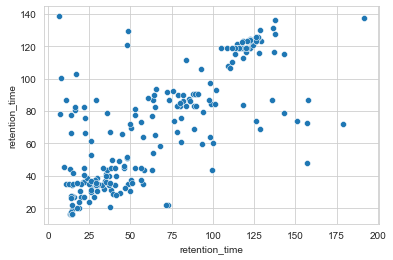

In [332]:
sns.scatterplot(y_test, y_pred)
# sns.scatterplot(y_train, y_train_pred)

In [334]:
import math
MSE = np.square(np.subtract(y_test,y_pred)).mean()

RMSE = math.sqrt(MSE)

In [335]:
print(MSE, RMSE)

781.077149750399 27.947757508437043
